**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: ---------------------------------------------------------
*   MATRÍCULA: ----------------------------------------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [5]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

In [6]:
mfrCer = cereals_df.mfr.value_counts()
shelfCer = cereals_df.shelf.value_counts()
display(mfrCer, shelfCer)

,count
mfr,
K,23
G,22
P,9
Q,8
R,8
N,6
A,1


,count
shelf,
3,36
2,21
1,20


2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

In [7]:
cereals_df.groupby(by='shelf')['mfr'].value_counts()

shelf  mfr
1      G       6
       K       4
       R       4
       N       3
       P       2
       Q       1
2      G       7
       K       7
       Q       3
       N       2
       A       1
       P       1
3      K      12
       G       9
       P       6
       Q       4
       R       4
       N       1
Name: count, dtype: int64

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

In [8]:
bins = [n for n in range(0,110,10)]
bins_df = pd.cut(cereals_df['rating'],bins)
bins_df.value_counts()

,count
rating,
"(30, 40]",24
"(40, 50]",19
"(50, 60]",13
"(20, 30]",11
"(60, 70]",5
"(10, 20]",2
"(70, 80]",2
"(90, 100]",1
"(0, 10]",0


3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [9]:
top10 = cereals_df[cereals_df['rating']>50].iloc[:10].sort_values(by='rating',ascending=False)
display(top10)
top10['mfr'].value_counts()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.0,1.00,64.533816
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
26,Frosted_Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7.0,100.0,25,2,1.0,0.80,58.345141
43,Maypo,A,H,100,4,1,0,0.0,16.0,3.0,95.0,25,2,1.0,1.00,54.850917
33,Grape-Nuts,P,C,110,3,0,170,3.0,17.0,3.0,90.0,25,3,1.0,0.25,53.371007
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.0,0.67,53.313813
32,Grape_Nuts_Flakes,P,C,100,3,1,140,3.0,15.0,5.0,85.0,25,3,1.0,0.88,52.076897
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1.0,105.0,25,1,1.0,1.25,50.764999


,count
mfr,
K,3
P,3
N,2
A,1
G,1


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

,0
A,"Axes(0.1,0.679412;0.235294x0.220588)"
G,"Axes(0.382353,0.679412;0.235294x0.220588)"
K,"Axes(0.664706,0.679412;0.235294x0.220588)"
N,"Axes(0.1,0.414706;0.235294x0.220588)"
P,"Axes(0.382353,0.414706;0.235294x0.220588)"
Q,"Axes(0.664706,0.414706;0.235294x0.220588)"
R,"Axes(0.1,0.15;0.235294x0.220588)"


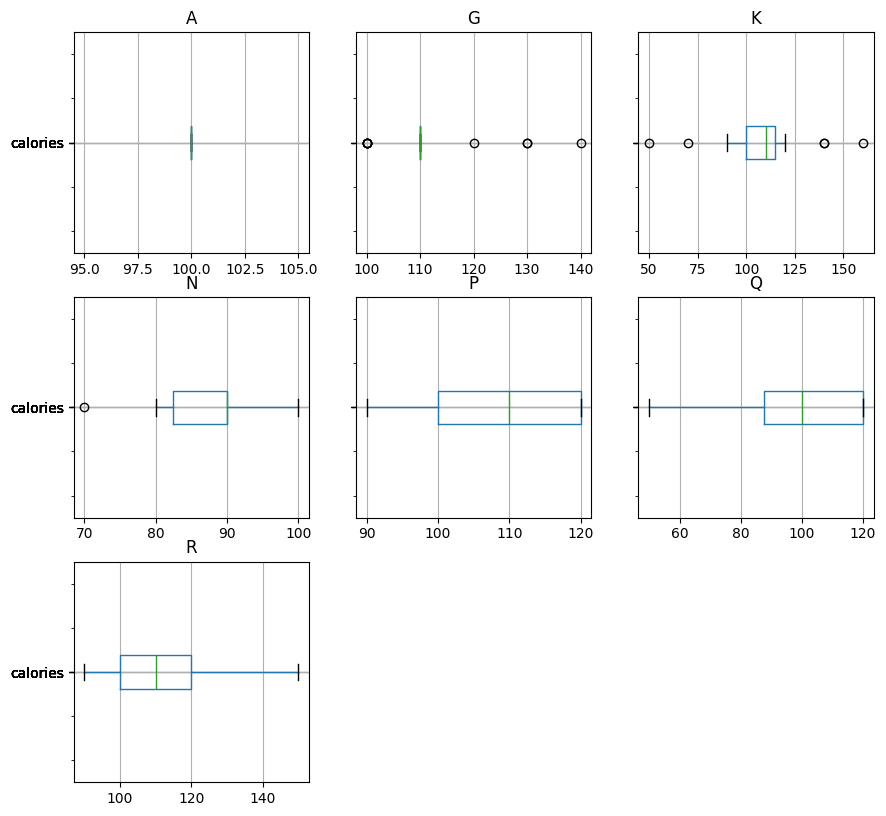

In [10]:
cereals_df.groupby(by='mfr').boxplot(column='calories',figsize=(10,10), vert=False)

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

In [11]:
cereals_df.select_dtypes(exclude=object).corr()['rating'].sort_values(ascending=False)[1:3]

,rating
fiber,0.584160
protein,0.470618


In [12]:
from sklearn.preprocessing import OneHotEncoder
ohEncoder = OneHotEncoder(sparse_output=False, drop='first')
encodeTable = ohEncoder.fit_transform(cereals_df.select_dtypes(exclude=np.number))
cereals_encDf = pd.DataFrame(encodeTable, columns=ohEncoder.get_feature_names_out(cereals_df.select_dtypes(exclude=np.number).columns))

In [13]:
combineDf= pd.concat((cereals_df,cereals_encDf),axis=0)
combineDf.drop(['name','mfr','type'],axis=1, inplace=True)
combineDf

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,name_Wheat_Chex,name_Wheaties,name_Wheaties_Honey_Gold,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,NaN,25.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
combineDf.corr()['rating'].sort_values(ascending=False)[1:3]

,rating
fiber,0.584160
protein,0.470618


5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [15]:
subsetList = [ n for n,v in zip(cereals_df.columns,cereals_df.isna().mean()) if v>0]
cereals_df.dropna(subset=subsetList,inplace=True)
cereals_df.reset_index(inplace=True)
cereals_df

,index,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = cereals_df['rating']
x = cereals_df.select_dtypes(exclude=object).drop('rating',axis=1)
x_transform = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_transform, columns=scaler.get_feature_names_out(x.columns))
x_scaled


,index,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,-1.738675,-1.878652,1.391180,0.0,-0.393692,3.250706,-2.517206,-0.255940,2.578001,-0.183083,0.948401,-0.202203,-2.099895
1,-1.693451,0.658214,0.455295,4.0,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,0.948401,-0.202203,0.761919
2,-1.648227,-1.878652,1.391180,0.0,1.187651,2.835245,-1.999780,-0.486911,3.146198,-0.183083,0.948401,-0.202203,-2.099895
3,-1.603003,-2.893399,1.391180,-1.0,-0.272050,4.912553,-1.741067,-1.641763,3.288247,-0.183083,0.948401,-0.202203,-1.373763
4,-1.512556,0.150841,-0.480589,1.0,0.214517,-0.280717,-1.094285,0.667942,-0.405032,-0.183083,-1.471657,-0.202203,-0.305922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1.517445,0.150841,-0.480589,0.0,1.066009,-0.903910,1.622199,-0.948852,-0.547081,-0.183083,0.948401,-0.202203,-0.305922
70,1.562669,0.150841,-1.416474,0.0,-0.272050,-0.903910,-0.447503,1.129883,-1.044254,-0.183083,-0.261628,-0.202203,0.761919
71,1.607892,-0.356533,0.455295,0.0,0.822725,0.342475,0.587348,-0.948852,0.234189,-0.183083,-1.471657,-0.202203,-0.647631
72,1.653116,-0.356533,0.455295,0.0,0.457800,0.342475,0.587348,-0.948852,0.163165,-0.183083,-1.471657,-0.202203,0.761919


In [23]:
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected, columns=x_scaled.columns)
x_projected

,index,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,5.153258,-2.903382,-0.196977,1.193430,0.871465,0.037529,0.436223,0.348783,0.214907,-0.199242,-0.068433,-0.169154,0.019625
1,2.128275,0.162399,-3.134920,-1.420175,-1.875971,2.535624,0.993043,-0.713477,-0.631023,-0.856160,0.572148,0.005686,-0.093968
2,4.977786,-2.366178,0.569928,2.083857,0.819123,0.409193,0.069934,0.863889,-0.440051,0.251610,-0.073187,0.500604,-0.041711
3,5.345878,-4.340747,1.689610,1.894622,1.155506,-0.193263,0.818399,-0.496725,-0.666904,-0.681246,-0.141035,-0.624016,0.110636
4,0.010978,0.214877,-2.025026,1.287168,-0.521334,0.349598,0.198220,0.676671,0.602224,-0.858927,0.075035,0.008435,-0.081571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.355042,0.512054,1.476102,-0.811985,0.051096,0.508803,-1.605749,0.432648,-0.993627,0.650341,0.058896,0.134571,0.113738
70,-1.784584,0.571459,-1.209423,-1.056159,0.347967,-1.053617,0.325751,0.646041,-0.787711,0.279207,0.132555,-0.282543,0.113500
71,-0.438624,-0.558949,1.575587,0.255498,-1.174148,-0.709799,-0.358531,1.547223,-0.307480,-0.332537,-0.077224,-0.039375,0.059590
72,-0.982604,-0.522065,1.543990,0.055238,-1.290220,-0.581639,0.705386,0.870491,-0.679862,-0.331729,0.036724,-0.168715,0.036187


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.